In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from os.path import join
plt.rc("axes.spines", top=False, right=False)

from analysis_functions import iqr, std, se
from glam.plots import plot_correlation

/Users/felixmolter/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
np.random.seed(7) # from random.org

# SI 1 Parameter estimates

In [3]:
parameters = ['v', 'gamma', 's', 'tau']

estimates_list = []

estimate_files = [file for file in os.listdir(join('results', 'estimates', 'in_sample', 'multiplicative'))
                  if file.endswith('.csv')]

for file in estimate_files:
    _, subject, _, _ = file.split('_')
    subject = int(subject)
    estimates = pd.read_csv(join('results', 'estimates', 'in_sample', 'multiplicative', file), index_col=0)
    subject_estimates = {parameter: estimates.loc[parameter + '__0_0', 'MAP']
                         for parameter in parameters}
    subject_estimates['subject'] = subject
    estimates_list.append(pd.DataFrame(subject_estimates, index=np.zeros(1)))

estimates = pd.concat(estimates_list).sort_values('subject').reset_index(drop=True)

estimates['dataset'] = np.array(39 * ['krajbich2010'] + 30 * ['krajbich2011'] + 24 * ['folke2016'] + 25 * ['tavares2017'])

estimates.head()

,v,gamma,s,tau,subject,dataset
0,0.000084,0.79,0.010750,0.49,0,krajbich2010
1,0.000095,-0.13,0.009213,0.22,1,krajbich2010
2,0.000024,0.82,0.009846,1.17,2,krajbich2010
3,0.000089,0.65,0.006601,0.09,3,krajbich2010
4,0.000090,0.51,0.009910,0.30,4,krajbich2010


In [4]:
print(estimates[parameters].agg(['mean', std, se, iqr, 'min', 'max']).T)

           mean       std        se       iqr       min       max
v      0.000066  0.000036  0.000003  0.000055  0.000017  0.000171
gamma  0.146695  0.394915  0.036510  0.537500 -1.100000  0.970000
s      0.008432  0.002380  0.000220  0.003550  0.003731  0.014355
tau    0.882627  0.805309  0.074451  0.657500  0.010000  4.820000


In [5]:
estimates.groupby('dataset')['gamma'].describe()

,count,mean,std,min,25%,50%,75%,max
dataset,,,,,,,,
folke2016,24.0,-0.016250,0.281468,-0.46,-0.280,-0.020,0.1950,0.47
krajbich2010,39.0,0.266667,0.486363,-0.89,-0.040,0.230,0.7000,0.97
krajbich2011,30.0,0.176333,0.414458,-1.10,-0.085,0.295,0.4625,0.81
tavares2017,25.0,0.080400,0.230552,-0.36,0.000,0.080,0.1900,0.56


In [6]:
def si_figure_1(estimates, figsize=(7.5, 7.5), fontsize=8, n_bins=21):

    datasets = ['krajbich2010', 'krajbich2011', 'folke2016', 'tavares2017']
    dataset_labels = ['Krajbich 2010', 'Krajbich 2011', 'Folke 2016', 'Tavares 2017']

    fig, axs = plt.subplots(len(datasets), 4, figsize=figsize, sharex='col', sharey=True)

    parameters = ['v', 'gamma', 's', 'tau']
    parameter_labels = [r'$v$ $[ms^{-1}]$', r'$\gamma$', r'$\sigma$ $[ms^{-1}]$', r'$\tau$']
    parameter_limits = [(0, 0.000225), (-1.5, 1.25), (0, 0.0225), (0, 5.5)]
    parameter_ticks = [[0, 0.0001, 0.0002], [-1, 0, 1], [0, 0.01, 0.02], [0, 1, 2, 3, 4, 5]]
    
    for p, (parameter, label, limits, ticks) in enumerate(zip(parameters, 
                                                              parameter_labels,
                                                              parameter_limits,
                                                              parameter_ticks)):
        
        for d, (dataset, dataset_label) in enumerate(zip(datasets, dataset_labels)):
            # Histograms
            _, _, patches = axs[d, p].hist(estimates.loc[estimates['dataset'] == dataset, parameter].values,
                                           bins=np.linspace(*limits, n_bins), color='C{}'.format(d))
            axs[d, p].set_xticks(ticks)
            axs[d, p].set_xlim(limits)
            axs[d, p].tick_params(axis='both', which='both', labelsize=fontsize)


            if p == 0:
                axs[d, p].set_ylabel('{}\n\nFrequency'.format(dataset_label), fontsize=fontsize)
                axs[d, p].set_yticks(np.arange(0, 31, 5))
                
            if d == (len(datasets) - 1):
                axs[d, p].set_xlabel(label, fontsize=fontsize)

    
    fig.tight_layout()

    return fig, axs

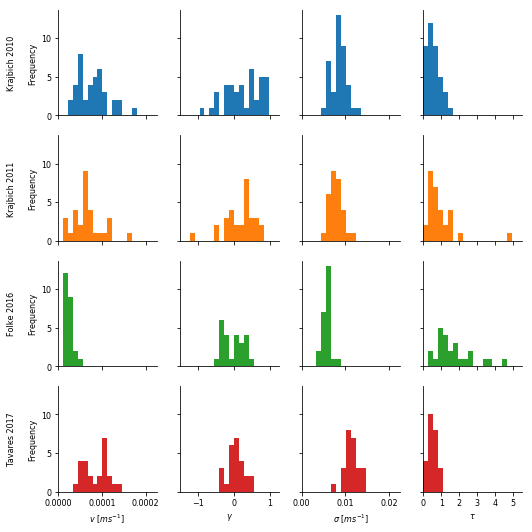

In [7]:
si_figure_1(estimates);
plt.savefig('results/figures/si_figure_1_parameter_estimates.png', dpi=330, bbox_inches='tight')
plt.show()